In [6]:
#########################################

In [1]:
from glob import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split
import random
import seaborn as sns
import sklearn.metrics
import pandas as pd
from sklearn.decomposition import PCA
checkpoint_path2 = '/home/gangmin_data/capstone_data/checkpoint2'
checkpoint_path = '/home/gangmin_data/capstone_data/checkpoint'


In [2]:
!pip install tensorflow-addons
import tensorflow_addons as tfa

/usr/local/lib/python3.6/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.3.0 and strictly below 2.5.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.5.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


In [3]:
tf.__version__

'2.5.0'

In [4]:
np.__version__

'1.19.5'

In [5]:
import zipfile
         
fantasy_zip = zipfile.ZipFile('/home/gangmin_data/capstone_data2/0_train.zip')
fantasy_zip.extractall('/home/gangmin_data/capstone_data2/training/0')

fantasy_zip = zipfile.ZipFile('/home/gangmin_data/capstone_data2/0_test.zip')
fantasy_zip.extractall('/home/gangmin_data/capstone_data2/test/0')

fantasy_zip = zipfile.ZipFile('/home/gangmin_data/capstone_data2/1_train.zip')
fantasy_zip.extractall('/home/gangmin_data/capstone_data2/training/1')

fantasy_zip = zipfile.ZipFile('/home/gangmin_data/capstone_data2/1_test.zip')
fantasy_zip.extractall('/home/gangmin_data/capstone_data2/test/1')

fantasy_zip = zipfile.ZipFile('/home/gangmin_data/capstone_data2/2_train.zip')
fantasy_zip.extractall('/home/gangmin_data/capstone_data2/training/2')

fantasy_zip = zipfile.ZipFile('/home/gangmin_data/capstone_data2/2_test.zip')
fantasy_zip.extractall('/home/gangmin_data/capstone_data2/test/2')

                       
fantasy_zip.close()

In [6]:
data_list = glob('/home/gangmin_data/capstone_data2/training/*/*/*.jpg')
data_list2 = glob('/home/gangmin_data/capstone_data2/training/*/*/*.JPG')

In [7]:
data_list = data_list + data_list2

In [8]:
test_data = glob('/home/gangmin_data/capstone_data2/test/*/*/*.jpg')
test_data2 = glob('/home/gangmin_data/capstone_data2/test/*/*/*.JPG')
test_data = test_data + test_data2

In [9]:
print(data_list[0])

/home/gangmin_data/capstone_data2/training/1/1_train/20210408_192946.jpg


In [10]:
data_list = test_data +data_list

In [11]:
data_list, test_data = train_test_split(data_list, test_size = 0.2,)

In [12]:
train_path = data_list

test_path = test_data

In [13]:
def get_label_from_path(path): #label 분리 
    list_label = []
    for i in range(len(path)):
        list_label.append(int(path[i].split('/')[-3]))
    return list_label

In [14]:
IMG_SIZE = 128 # 모든 이미지는 128x128으로 크기가 조정됩니다

def format_example(path):   #전처리
    image = np.array(Image.open(path))
    image = tf.cast(image, tf.float32)
    image = (image/127.5) -1
    if image.ndim != (3 or 4):
        print(path, 'ndim =', image.ndim)
        os.remove(path)
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image

In [15]:

label = get_label_from_path(train_path)

test_label = get_label_from_path(test_path)


In [16]:
print(label)
print(len(label))

[0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 1, 2, 0, 0, 2, 0, 1, 2, 2, 1, 0, 0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 0, 2, 1, 0, 0, 2, 2, 2, 2, 1, 0, 1, 0, 2, 0, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 1, 0, 1, 2, 2, 2, 0, 0, 0, 2, 2, 1, 1, 2, 2, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 1, 2, 0, 0, 2, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 1, 0, 0, 2, 1, 2, 0, 1, 2, 2, 0, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 0, 2, 0, 2, 1, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 1, 2, 2, 0, 2, 1, 2, 1, 0, 1, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 1, 1, 0, 1, 2, 0, 0, 2, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 0, 2, 0, 2, 2, 0, 

In [17]:
print(test_label)
print(len(test_label))
print(test_label.count(1))
print(test_label.count(2))
print(test_label.count(0))

[2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 2, 1, 2, 2, 0, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 1, 0, 1, 0, 0, 2, 0, 2, 0, 1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 1, 2, 0, 2, 2, 1, 1, 1, 1, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2, 2, 1, 2, 2, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 2, 0, 0, 0, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 1, 2, 2, 1, 0, 1, 2, 1, 1, 2, 2, 1, 0, 2, 2, 1, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 1, 1, 1, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 

In [18]:
batch_size = 32
data_height = 128
data_width = 128
channel_n = 3

def make_Batch_image(data_list):
    batch_image = np.zeros((len(data_list), data_height, data_width,channel_n))
    for n in range(len(data_list)):
        path = data_list[n]
        image = format_example(path)
        if image.shape != (data_height,data_width, 3):
            os.remove(path)
        else:
            batch_image[n,:,:,:] = image
    return batch_image

In [19]:
train_image = make_Batch_image(train_path)
test_image = make_Batch_image(test_data)


In [20]:
print(train_image.shape)

(2011, 128, 128, 3)


In [21]:
def make_dataset(image, label):
    image = tf.cast(image, dtype = 'float32')
    label = tf.cast(label, dtype = 'uint8')
    ds = tf.data.Dataset.from_tensor_slices( (image, label)).shuffle(1971).batch(32)
    return ds

In [22]:
train_ds = make_dataset(train_image, label)
test_ds = make_dataset(test_image, test_label)


In [23]:
train_ds
for image_batch, label_batch in train_ds.take(1):
    print(image_batch.shape)
    print(label_batch.shape)

(32, 128, 128, 3)
(32,)


In [166]:
import random

def augment(image, label):
   # Random crop back to the original size
    a = random.uniform(0.1,0.5)
    b = random.randrange(0, 359)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_flip_left_right(image)
    image = tf.image.adjust_saturation(image, 3)
    image = tf.image.adjust_brightness(image, a)
    image = tfa.image.rotate(image, angles = b, fill_mode = 'reflect') # Random brightnes
    
    return image, label

train_ds = (train_ds.shuffle(1975).map(augment, 
                                       num_parallel_calls = tf.data.experimental.AUTOTUNE).prefetch(tf.data.experimental.AUTOTUNE))

In [167]:
for img, label in train_ds.take(1):
    print(img)
    print(label)

tf.Tensor(
[[[[ 0.7900796   0.71949136  0.6018443 ]
   [ 0.76917446  0.6985862   0.5809392 ]
   [ 0.75847054  0.6878823   0.5702354 ]
   ...
   [-0.00777866 -0.00777866 -0.00777866]
   [-0.02916777 -0.02916777 -0.02916777]
   [-0.03694245 -0.03694245 -0.03694245]]

  [[ 0.7428528   0.67557335  0.5579263 ]
   [ 0.72512865  0.6578493   0.5402022 ]
   [ 0.748693    0.68141365  0.5637666 ]
   ...
   [ 0.05172175  0.05172175  0.05172175]
   [-0.0269035  -0.0269035  -0.0269035 ]
   [-0.06267247 -0.06267247 -0.06267247]]

  [[ 0.7300832   0.7065538   0.5916642 ]
   [ 0.6869111   0.6633817   0.54849195]
   [ 0.71226096  0.68873155  0.5738419 ]
   ...
   [ 0.03213738  0.03213738  0.03213738]
   [ 0.0129441   0.0129441   0.0129441 ]
   [ 0.01121643  0.01121643  0.01121643]]

  ...

  [[ 0.26458657  0.21827814  0.20221195]
   [ 0.2249099   0.20805839  0.20221195]
   [ 0.21275648  0.20492797  0.20221195]
   ...
   [ 0.20221195  0.55343413  0.79910135]
   [ 0.20221195  0.5057479   0.7289363 ]
   [ 

In [25]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
transfer_model1 = tf.keras.applications.MobileNet(include_top = False, weights = 'imagenet', 
                                                  input_shape =IMG_SHAPE ) 


In [196]:
transfer_model1.summary()

Model: "mobilenet_1.00_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_39 (InputLayer)        [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 64, 64, 32) 

In [197]:

modelcheck = tf.keras.callbacks.ModelCheckpoint(filepath= checkpoint_path ,monitor= 'val_loss', 
                                                save_best_only= True, mode = 'min', save_freq= 'epoch' )
callback = tf.keras.callbacks.EarlyStopping(monitor= 'val_loss', patience= 3)

def get_ensemble():
    inputs = tf.keras.Input(shape = IMG_SHAPE)
    x = transfer_model1(inputs)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(1024,)(x)
    outputs = tf.keras.layers.Lambda(lambda x: tf.math.l2_normalize(x, axis=1))(x)
    return tf.keras.Model(inputs, outputs)

model1 = get_ensemble()
model2 = get_ensemble()
model3 = get_ensemble()

inputs = tf.keras.Input(shape = IMG_SHAPE)

y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)

outputs = tf.keras.layers.average([y1,y2,y3])

ensemble_model = tf.keras.Model(inputs = inputs,outputs = outputs)

ensemble_model.compile(loss = tfa.losses.LiftedStructLoss(),
             optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0005),)

ensemble_model.fit(
    train_ds,
    validation_data = test_ds,
    callbacks= [callback, modelcheck],
    epochs=100)


Epoch 1/100
63/63 [==============================] - 60s 866ms/step - loss: 6.5024 - val_loss: 5.4344


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /home/gangmin_data/capstone_data/checkpoint/assets
Epoch 2/100
63/63 [==============================] - 54s 853ms/step - loss: 5.3091 - val_loss: 4.9061


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /home/gangmin_data/capstone_data/checkpoint/assets
Epoch 3/100
63/63 [==============================] - 54s 848ms/step - loss: 4.7583 - val_loss: 4.7567


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /home/gangmin_data/capstone_data/checkpoint/assets
Epoch 4/100
63/63 [==============================] - 55s 865ms/step - loss: 4.7148 - val_loss: 5.0429
Epoch 5/100
63/63 [==============================] - 55s 865ms/step - loss: 4.3919 - val_loss: 4.9055
Epoch 6/100
63/63 [==============================] - 54s 862ms/step - loss: 4.3561 - val_loss: 5.0633


In [203]:
ensemble_model = tf.keras.models.load_model(checkpoint_path)
ensemble_model.evaluate(test_ds, batch_size=128, verbose=1)

16/16 [==============================] - 3s 134ms/step - loss: 4.7423


4.742343425750732

In [204]:
ensemble_model.trainble = False

ensemble_model_result = tf.keras.Sequential([
    ensemble_model,
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(3)
])

In [205]:

modelcheck2 = tf.keras.callbacks.ModelCheckpoint(filepath= checkpoint_path2 ,monitor= 'val_loss', 
                                                 save_best_only= True, mode = 'min', save_freq= 'epoch' )

ensemble_model_result.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
             optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0006),
             metrics = ['accuracy'])

ensemble_model_result.fit(train_ds, validation_data = test_ds, epochs = 100, 
                          callbacks = [callback, modelcheck2])


Epoch 1/100
63/63 [==============================] - 60s 874ms/step - loss: 0.3407 - accuracy: 0.9304 - val_loss: 0.2724 - val_accuracy: 0.9264


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /home/gangmin_data/capstone_data/checkpoint2/assets
Epoch 2/100
63/63 [==============================] - 54s 855ms/step - loss: 0.1292 - accuracy: 0.9647 - val_loss: 0.1875 - val_accuracy: 0.9423


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /home/gangmin_data/capstone_data/checkpoint2/assets
Epoch 3/100
63/63 [==============================] - 53s 845ms/step - loss: 0.0945 - accuracy: 0.9727 - val_loss: 0.1240 - val_accuracy: 0.9742


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /home/gangmin_data/capstone_data/checkpoint2/assets
Epoch 4/100
63/63 [==============================] - 55s 874ms/step - loss: 0.0679 - accuracy: 0.9806 - val_loss: 0.1792 - val_accuracy: 0.9543
Epoch 5/100
63/63 [==============================] - 56s 881ms/step - loss: 0.0512 - accuracy: 0.9851 - val_loss: 0.2084 - val_accuracy: 0.9523
Epoch 6/100
63/63 [==============================] - 55s 871ms/step - loss: 0.0735 - accuracy: 0.9831 - val_loss: 0.2545 - val_accuracy: 0.9344


In [24]:
ensemble_model_result = tf.keras.models.load_model(checkpoint_path2)
ensemble_model_result.evaluate(test_ds)

16/16 [==============================] - 3s 128ms/step - loss: 0.0715 - accuracy: 0.9801


[0.07148324698209763, 0.9801192879676819]

In [49]:
LABELS = ['Warts', 'Corns', 'Normal Skin']

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def confusion_mat(model,test_image,test_label):
    plt.figure(figsize = (7,5))
    plt.title("Confusion Matrix")
    predictions = model.predict(test_image)
    arg = np.argmax(predictions, axis = 1)
    tf.math.confusion_matrix(labels = test_label, predictions = arg)
    sns.heatmap(tf.math.confusion_matrix(labels = test_label, predictions = arg), 
                xticklabels= LABELS, yticklabels= LABELS, cmap = 'Blues', annot = True, fmt = "d" )

    metric = tfa.metrics.F1Score(num_classes = 3, threshold = None, average = 'weighted' )
    category = tf.keras.utils.to_categorical(test_label, num_classes = 3)
    metric.update_state(category, predictions)

    result = metric.result()
    print("F1 Score",result)
    plt.xlabel("PREDICTED LABEL")
    plt.ylabel("TRUE LABEL")
    plt.show()  
    
    print("Precision", precision_score(test_label, arg, average = 'weighted'))
    print("Recall", recall_score(test_label, arg, average = 'weighted'))




In [50]:
def confusion_norm(model,test_image,test_label ):
    plt.figure(figsize = (7,5))
    plt.title("Confusion Matrix")
    predictions = model.predict(test_image)
    arg = np.argmax(predictions, axis = 1)
    normalize= sklearn.metrics.confusion_matrix(test_label, arg, normalize='true')
    sns.heatmap(normalize, xticklabels= LABELS, yticklabels= LABELS, cmap = 'Blues', annot = True, fmt = ".4f")
    plt.xlabel("PREDICTED LABEL")
    plt.ylabel("TRUE LABEL")
    plt.show()

F1 Score tf.Tensor(0.97424155, shape=(), dtype=float32)


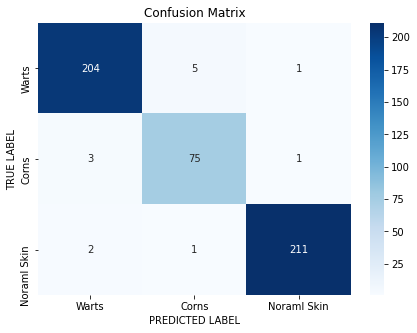

Precision 0.9743833698445539
Recall 0.974155069582505


In [207]:
confusion_mat(ensemble_model_result,test_image, test_label)

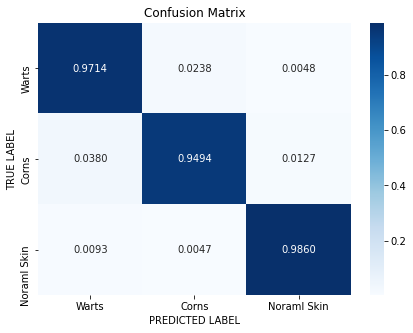

In [208]:
confusion_norm(ensemble_model_result,test_image, test_label)

In [33]:
############## MobileNet Crossentropy

In [39]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
transfer_model2 = tf.keras.applications.MobileNet(include_top = False, weights = 'imagenet',
                                                  input_shape =IMG_SHAPE )
transfer_model2.trainable = False

In [40]:
model = tf.keras.Sequential([
    transfer_model2,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(3)
])

In [41]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
             optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0006),
             metrics = ['accuracy'])


In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_128 (Function (None, 4, 4, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8

In [48]:
callback = tf.keras.callbacks.EarlyStopping(monitor= 'loss', patience= 3)
model.fit(train_ds, validation_data= test_ds, epochs = 100, callbacks= [callback])


Epoch 1/100
63/63 [==============================] - 7s 99ms/step - loss: 0.0341 - accuracy: 0.9886 - val_loss: 0.4701 - val_accuracy: 0.9125
Epoch 2/100
63/63 [==============================] - 6s 99ms/step - loss: 0.0073 - accuracy: 0.9980 - val_loss: 0.5820 - val_accuracy: 0.9145
Epoch 3/100
63/63 [==============================] - 6s 96ms/step - loss: 0.0708 - accuracy: 0.9771 - val_loss: 0.3966 - val_accuracy: 0.9046
Epoch 4/100
63/63 [==============================] - 6s 98ms/step - loss: 0.0100 - accuracy: 0.9970 - val_loss: 0.4770 - val_accuracy: 0.9145
Epoch 5/100
63/63 [==============================] - 6s 97ms/step - loss: 0.0127 - accuracy: 0.9960 - val_loss: 0.5544 - val_accuracy: 0.9006


In [44]:
model.evaluate(test_ds)

16/16 [==============================] - 1s 74ms/step - loss: 0.3772 - accuracy: 0.9026


[0.377185195684433, 0.9025844931602478]

F1 Score tf.Tensor(0.9332057, shape=(), dtype=float32)


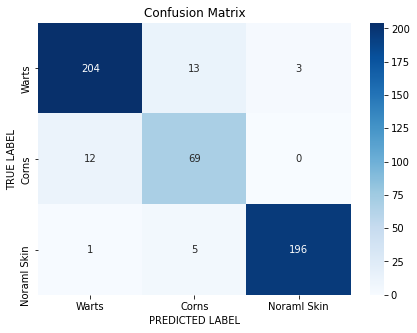

Precision 0.9344263015455018
Recall 0.9324055666003976


In [78]:
confusion_mat(model,test_image, test_label)

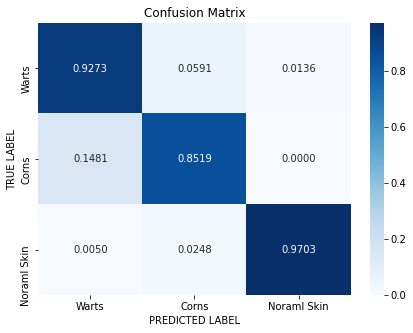

In [79]:
confusion_norm(model,test_image, test_label)

In [ ]:
#미세조정

In [32]:
transfer_model2.trainable = True

In [33]:
print('number of layers :', len(fine_inception.layers))

number of layers : 311


In [34]:
fine_layer = 70

In [35]:
for layer in transfer_model2.layers[:fine_layer]:
    layer.trainable = False

In [36]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
             optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001),
             metrics = ['accuracy'])

In [37]:
checkpoint_path2 = '/home/gangmin_data/capstone_data/checkpoint2'
modelcheck2 = tf.keras.callbacks.ModelCheckpoint(filepath= checkpoint_path2 ,monitor= 'val_loss', 
                                                 save_best_only= True, mode = 'min', save_freq= 'epoch' )

model.fit(train_ds, validation_data= test_ds, epochs = 100, callbacks= [callback,modelcheck2])


model = tf.keras.models.load_model(checkpoint_path2)

Epoch 1/100
62/62 [==============================] - 29s 382ms/step - loss: 0.6699 - accuracy: 0.7273 - val_loss: 0.5219 - val_accuracy: 0.8720
INFO:tensorflow:Assets written to: /home/gangmin_data/capstone_data/checkpoint2/assets
Epoch 2/100
62/62 [==============================] - 23s 360ms/step - loss: 0.2971 - accuracy: 0.8925 - val_loss: 0.3056 - val_accuracy: 0.9091
INFO:tensorflow:Assets written to: /home/gangmin_data/capstone_data/checkpoint2/assets
Epoch 3/100
62/62 [==============================] - 24s 366ms/step - loss: 0.2307 - accuracy: 0.9094 - val_loss: 0.3066 - val_accuracy: 0.8942
Epoch 4/100
62/62 [==============================] - 24s 375ms/step - loss: 0.2184 - accuracy: 0.9241 - val_loss: 0.2894 - val_accuracy: 0.8998
INFO:tensorflow:Assets written to: /home/gangmin_data/capstone_data/checkpoint2/assets
Epoch 5/100
62/62 [==============================] - 23s 361ms/step - loss: 0.1331 - accuracy: 0.9456 - val_loss: 0.4266 - val_accuracy: 0.8627
Epoch 6/100
62/62 [

In [38]:
model.evaluate(test_ds)

17/17 [==============================] - 3s 103ms/step - loss: 0.2894 - accuracy: 0.8998


[0.2894459366798401, 0.8998144865036011]

In [ ]:
##################### naive 모델

In [25]:
naive = tf.keras.applications.ResNet50(include_top = False, weights = None, input_shape = IMG_SHAPE)

In [26]:
naive.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [28]:
naive_model = tf.keras.Sequential([
    naive,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(3),
])

In [36]:
callback = tf.keras.callbacks.EarlyStopping(monitor= 'val_loss', patience= 3)

naive_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
             optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
             metrics = ['acc'])

naive_model.fit(train_ds, batch_size= 32, validation_data = test_ds, epochs = 100, callbacks = [callback])


Epoch 1/100
63/63 [==============================] - 89s 1s/step - loss: 1.0621 - acc: 0.4276 - val_loss: 41.8670 - val_acc: 0.3877
Epoch 2/100
63/63 [==============================] - 83s 1s/step - loss: 1.0133 - acc: 0.5158 - val_loss: 2.2714 - val_acc: 0.4990
Epoch 3/100
63/63 [==============================] - 83s 1s/step - loss: 0.9713 - acc: 0.5569 - val_loss: 1.5531 - val_acc: 0.4453
Epoch 4/100
63/63 [==============================] - 83s 1s/step - loss: 0.9833 - acc: 0.5101 - val_loss: 1.0273 - val_acc: 0.4732
Epoch 5/100
63/63 [==============================] - 83s 1s/step - loss: 0.9384 - acc: 0.5729 - val_loss: 1.0262 - val_acc: 0.4831
Epoch 6/100
63/63 [==============================] - 82s 1s/step - loss: 0.9243 - acc: 0.5897 - val_loss: 0.9914 - val_acc: 0.5447
Epoch 7/100
63/63 [==============================] - 81s 1s/step - loss: 0.8553 - acc: 0.6384 - val_loss: 0.9252 - val_acc: 0.6143
Epoch 8/100
63/63 [==============================] - 82s 1s/step - loss: 0.8250 - 

In [157]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
y_true = test_label
y_pred = np.argmax(naive_model.predict(test_image), axis = 1)
print(precision_score(y_true, y_pred, average = 'weighted'))
print(recall_score(y_true, y_pred, average = 'weighted'))




0.6539246549529678
0.6023856858846919


In [42]:
np.argmax(naive_model.predict(test_ds), axis = 1)

array([0, 0, 0, 0, 2, 2, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 1, 2, 0, 2,
       0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2, 0, 2, 0, 0, 1, 2, 2, 2, 1, 1,
       0, 2, 1, 0, 1, 1, 2, 2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 1, 0, 2, 2, 0, 1, 0, 1, 0, 0, 2, 2, 0, 2, 1, 2, 0,
       2, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 2, 1, 0, 1, 2, 0, 0, 0, 1, 0,
       1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 2,
       0, 0, 1, 1, 0, 1, 2, 2, 0, 0, 1, 1, 0, 2, 1, 2, 0, 0, 0, 1, 1, 0,
       0, 2, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 0, 1, 2, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 2, 0,
       2, 1, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2,
       0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0,

In [261]:
def pca(model,test_image, test_label):

    pd_list = pd.DataFrame(test_label, columns = ['label'])
    a= model.predict(test_image)

    pca = PCA(n_components = 2)
    component = pca.fit_transform(a)

    principalDf = pd.DataFrame(data = component, 
                           columns = ['principal component 1', 'principal component 2'])
    finalDataFrame = pd.concat([principalDf, pd_list], axis=1)
    y = pd_list.loc[:,['label']].values

    labels = []
    yList = y.tolist()
    for label in yList:
        if label[0] not in labels:
            labels.append(label[0])
    
    

    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 Component PCA', fontsize = 20)

    colors = ["#7fc97f","#beaed4","#fdc086",]
    for label, color in zip(labels, colors):
        indicesToKeep = finalDataFrame['label'] == label
        ax.scatter(finalDataFrame.loc[indicesToKeep, 'principal component 1']
                   , finalDataFrame.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 30)

    ax.legend(LABELS)
    ax.grid()

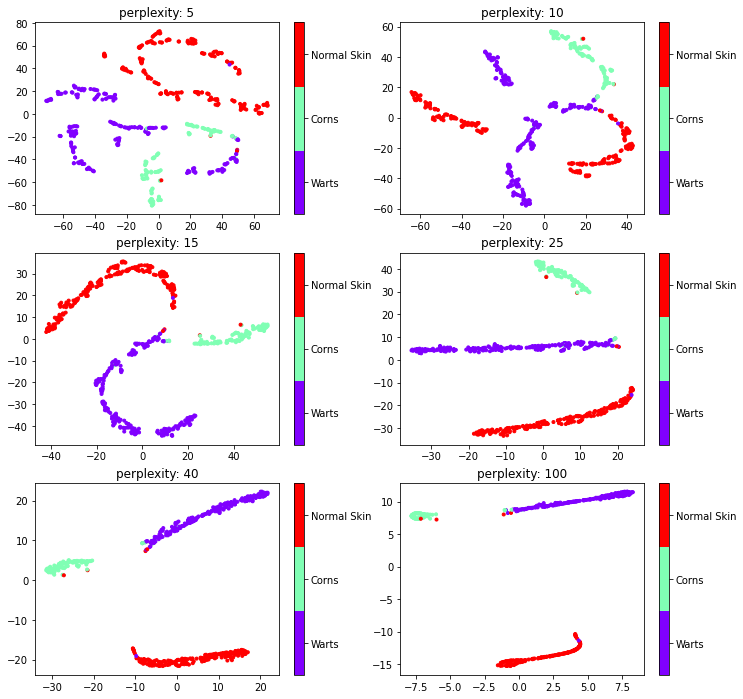

In [36]:
perplexities = [5, 10, 15, 25, 40, 100]
plt.figure(figsize=(12,12))

for c in range(6):
    latent_vector = ensemble_model_result.predict(test_image)
    tsne = TSNE(n_components=2, learning_rate=100, perplexity=perplexities[c], random_state=0)
    tsne_vector = tsne.fit_transform(latent_vector)

    plt.subplot(3, 2, c+1)
    cmap = plt.get_cmap('rainbow', 3)
    plt.scatter(tsne_vector[:,0], tsne_vector[:,1], marker='.', c=test_label, cmap=cmap)
    plt.title('perplexity: {0}'.format(perplexities[c]))
    cb = plt.colorbar(fig, ticks=LABELS)
    n_clusters = 3
    tick_locs = (np.arange(n_clusters) + 0.5)*(n_clusters-1)/n_clusters
    cb.set_ticks(tick_locs)
    cb.set_ticklabels(LABELS)

plt.show()

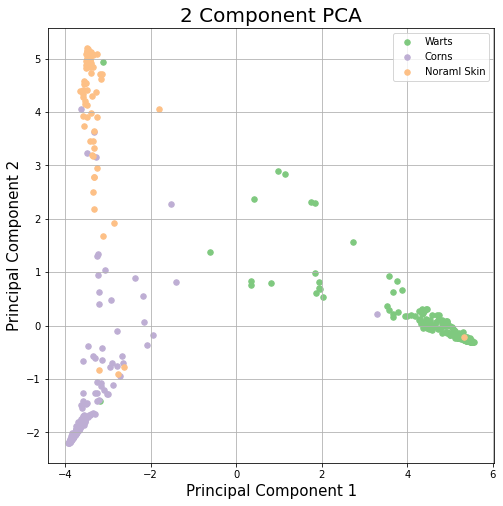

In [262]:
pca(ensemble_model_result, test_image, test_label)

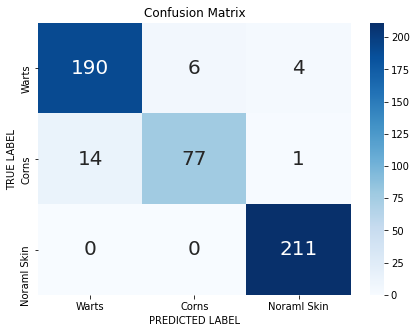

In [155]:
data = [[190,6,4],[14,77,1],[0,0,211]]

plt.figure(figsize = (7,5))
sns.heatmap(data, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt = "d", cmap = 'Blues',
           annot_kws = {"size": 20})
plt.title("Confusion Matrix")
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.show()

In [113]:
import sys
print(sys.version)

3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]


In [114]:
tf.__version__

'2.5.0'

In [3]:
from sklearn.manifold import TSNE


In [25]:
latent_vector = model.predict(test_image)

NameError: name 'model' is not defined

In [212]:
latent_vector.shape

(503, 3)

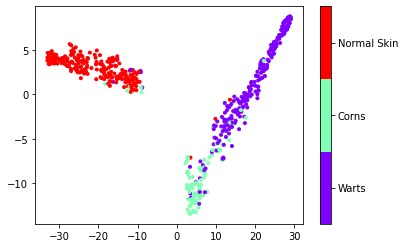

In [49]:

cb = plt.colorbar(fig, ticks=LABELS)
LABELS = ['Warts', 'Corns', 'Normal Skin']
latent_vector = model.predict(test_image)
tsne = TSNE(n_components=2, learning_rate=100, perplexity=50, random_state=0)
tsne_vector = tsne.fit_transform(latent_vector)
cmap = plt.get_cmap('rainbow', 3)
fig = plt.scatter(tsne_vector[:,0], tsne_vector[:,1], marker='.', c=test_label, cmap=cmap)
n_clusters = 3
tick_locs = (np.arange(n_clusters) + 0.5)*(n_clusters-1)/n_clusters
cb.set_ticks(tick_locs)
cb.set_ticklabels(LABELS)


plt.show()

In [ ]:
ensemble_model_result

그림 . MobileNet 모델과 교차 엔트로피 손실을 활용한 학습 평가 t-SNE
MobileNet 모델과 Lifted Structured 손실을 활용한 학습 평가 t-SNE